<a href="https://colab.research.google.com/github/manashpratim/Stock-Price-Prediction/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading the datasets
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/854/1575/prices-split-adjusted.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1565054445&Signature=J0F8Vzig2A5hBrToLl5LFQvJH%2FDaLLJZnElHfQ7tCNrzGtBhqxvFp9QWyywGlaeFY%2FAVEUWJs29yYLaG5iAleDtX%2BLg7tGSJP3msdXRU1xjiWJxivkHXX0IRTKsJG6fjYMVtB86o%2BsDbu6H%2BH2rnUTM5ka0EKSS2bTg79pe3wIf0bOr7b9ywcVB2P%2BfOBKi%2FrcS1Ukf5rXT7IOyFIze8z7XROSgia6NC9O4gLBEEs2ICVac8pxh95wiK1%2Fy4Vzf5kpZ9Vj1Hu0OF1h0h3Mk5QN%2B2tdBdBidwndhv4WiWmHYUtn%2B1cc8eMFHn65rba4E5PjRv90RLoyR2t35EKmfdqQ%3D%3D"\
      -O "/tmp/nyse.zip"

--2019-08-03 04:46:31--  https://storage.googleapis.com/kaggle-datasets/854/1575/prices-split-adjusted.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1565054445&Signature=J0F8Vzig2A5hBrToLl5LFQvJH%2FDaLLJZnElHfQ7tCNrzGtBhqxvFp9QWyywGlaeFY%2FAVEUWJs29yYLaG5iAleDtX%2BLg7tGSJP3msdXRU1xjiWJxivkHXX0IRTKsJG6fjYMVtB86o%2BsDbu6H%2BH2rnUTM5ka0EKSS2bTg79pe3wIf0bOr7b9ywcVB2P%2BfOBKi%2FrcS1Ukf5rXT7IOyFIze8z7XROSgia6NC9O4gLBEEs2ICVac8pxh95wiK1%2Fy4Vzf5kpZ9Vj1Hu0OF1h0h3Mk5QN%2B2tdBdBidwndhv4WiWmHYUtn%2B1cc8eMFHn65rba4E5PjRv90RLoyR2t35EKmfdqQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.25.240, 2404:6800:4004:80e::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.25.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17479071 (17M) [application/zip]
Saving to: ‘/tmp/nyse.zip’

/tmp/nyse.zip       100%[===================>]  16.67M  29.8MB/s    in 0.6s    

2019-08-03 04:46:32 (29.8 MB/s) - 

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/nyse.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/nyse')
zip_ref.close()

In [0]:
#Loading the dataset
import pandas as pd
df=pd.read_csv('/tmp/nyse/prices-split-adjusted.csv')

In [0]:
#Getting the Stock Prices of a company
sym='MSFT'
symbol=pd.DataFrame(df[df['symbol']==sym].values,columns=df.columns)

In [5]:
symbol.head(4)

,date,symbol,open,close,low,high,volume
0,2010-01-04,MSFT,30.62,30.95,30.59,31.1,3.84091e+07
1,2010-01-05,MSFT,30.85,30.96,30.64,31.1,4.97496e+07
2,2010-01-06,MSFT,30.88,30.77,30.52,31.08,5.81824e+07
3,2010-01-07,MSFT,30.63,30.45,30.19,30.7,5.05597e+07


In [6]:
len(symbol)

1762

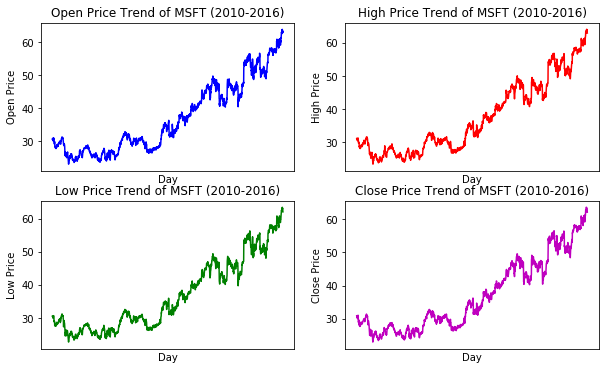

In [8]:
#Visualizing the Trend of Strock Prices for a company
import matplotlib.pyplot as plt
import numpy as np
t = symbol['date']
a = symbol['open']
b = symbol['high']
c = symbol['low']
d = symbol['close']

plt.figure(figsize=(10,6))
plt.subplot(221)
plt.xticks([])
plt.plot(t, a,'b')
plt.ylabel('Open Price')
plt.xlabel('Day')
plt.title('Open Price Trend of MSFT (2010-2016)')

plt.subplot(222)
plt.xticks([])
plt.plot(t, b,'r')
plt.ylabel('High Price')
plt.xlabel('Day')
plt.title('High Price Trend of MSFT (2010-2016)')

plt.subplot(223)
plt.xticks([])
plt.plot(t, c,'g')
plt.ylabel('Low Price')
plt.xlabel('Day')
plt.title('Low Price Trend of MSFT (2010-2016)')

plt.subplot(224)
plt.xticks([])
plt.plot(t, d,'m')
plt.ylabel('Close Price')
plt.xlabel('Day')
plt.title('Close Price Trend of MSFT (2010-2016)')

plt.show()


In [9]:
#Getting the Close Price for the company
series=[]
time_stamps=[]

for i in range(len(symbol)):
  series.append(symbol['close'][i])
  time_stamps.append(symbol['date'][i])

series=np.array(series)
time=np.array(time_stamps)
print(series.shape)
print(time.shape)      

(1762,)
(1762,)


In [0]:
import tensorflow as tf

In [0]:
#Function to prepare the dataset for training
def windowed_dataset(series,window_size,batch_size,shuffle_buffer):
    dataset=tf.data.Dataset.from_tensor_slices(series)
    dataset=dataset.window(window_size+1,shift=1,drop_remainder=True)
    dataset=dataset.flat_map(lambda window:window.batch(window_size+1))
    dataset=dataset.shuffle(shuffle_buffer)
    dataset=dataset.map(lambda window:(window[:-1],window[-1]))
    dataset=dataset.batch(batch_size).prefetch(1)
    return dataset

In [0]:
#Prediction Function
def forecast(model,series,window_size,split_time):
  forecast=[]
  for time in range(len(series)-window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))
  forecast=forecast[split_time-window_size:]
  results=np.array(forecast)[:,0,0]
  return results  

In [0]:
#Train Test Split
split_time=1258
x_train=series[:split_time]
time_train=time[:split_time]
x_valid=series[split_time:]
time_valid=time[split_time:]
window_size=20
batch_size=252
shuffle_buffer=1000

In [0]:
tf.keras.backend.clear_session()
tf.random.set_random_seed(51)
np.random.seed(51)
tf.keras.backend.clear_session()
dataset=windowed_dataset(x_train,window_size,batch_size,shuffle_buffer)

In [0]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1)
                            # ,input_shape=[None]
                            ),
      tf.keras.layers.Conv1D(32,kernel_size=5,strides=1,padding='causal',activation='relu',input_shape=[None,1]),
      #tf.keras.layers.LSTM(32,return_sequences=True),
      #tf.keras.layers.LSTM(32),
      tf.keras.layers.SimpleRNN(32,return_sequences=True),
      tf.keras.layers.SimpleRNN(32),
      #tf.keras.layers.Dense(20,activation='relu'),
      #tf.keras.layers.Dense(10,activation='relu'),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Lambda(lambda x:x*100)
])

In [237]:
#lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-8*10**(epochs/20))
loss=tf.keras.losses.Huber()
optimizer=tf.keras.optimizers.RMSprop(lr=2.5e-5, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss=loss,optimizer=optimizer,metrics=['mae'])
history=model.fit(dataset,epochs=250
                  #,callbacks=[lr_scheduler]
                 )

Epoch 1/250
5/5 [==============================] - 1s 162ms/step - loss: 63.7466 - mean_absolute_error: 64.3720
Epoch 2/250
5/5 [==============================] - 0s 38ms/step - loss: 51.5714 - mean_absolute_error: 52.1644
Epoch 3/250
5/5 [==============================] - 0s 39ms/step - loss: 42.4106 - mean_absolute_error: 42.9973
Epoch 4/250
5/5 [==============================] - 0s 29ms/step - loss: 34.2828 - mean_absolute_error: 34.8413
Epoch 5/250
5/5 [==============================] - 0s 30ms/step - loss: 27.1801 - mean_absolute_error: 27.7280
Epoch 6/250
5/5 [==============================] - 0s 34ms/step - loss: 21.2944 - mean_absolute_error: 21.8294
Epoch 7/250
5/5 [==============================] - 0s 34ms/step - loss: 16.5601 - mean_absolute_error: 17.0910
Epoch 8/250
5/5 [==============================] - 0s 38ms/step - loss: 13.1186 - mean_absolute_error: 13.6355
Epoch 9/250
5/5 [==============================] - 0s 36ms/step - loss: 10.8052 - mean_absolute_error: 11.2995


[1e-08, 0.001, 0, 10]

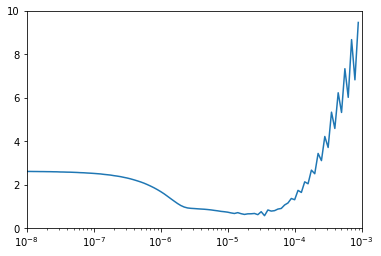

In [217]:
#Optimizing the Learning Rate
lrs=1e-8*(10**(np.arange(100)/20))
plt.semilogx(lrs,history.history['loss'])
plt.axis([1e-8,1e-3,0,10])

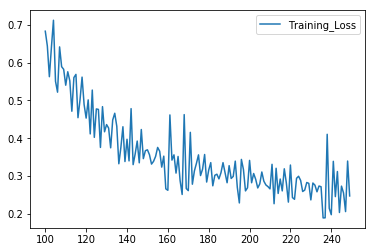

In [238]:
#Visualizing the Loss over the epochs
loss=history.history['loss']
epochs=range(100,len(loss))
plt.plot(epochs,loss[100:],label='Training_Loss')
plt.legend(loc='upper right')
plt.show()

In [0]:
#Forecasting the stock prices
predictions=forecast(model,series,window_size,split_time)

([], <a list of 0 Text xticklabel objects>)

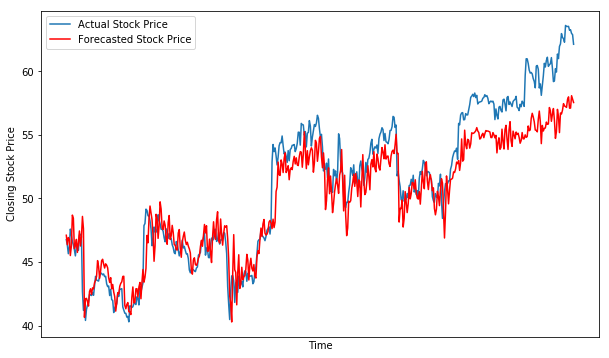

In [240]:
#Visualizing the Forecasted Stock Prices
plt.figure(figsize=(10,6))
plt.plot(time_valid,x_valid,label='Actual Stock Price')
plt.plot(time_valid,predictions,'r',label='Forecasted Stock Price')
plt.xlabel('Time')
plt.ylabel('Closing Stock Price')
plt.legend(loc='upper left')
plt.xticks([])

In [241]:
#Performance Metric Summary
errors= predictions-x_valid
print('Mean Absolute Error: ',np.abs(errors).mean())
print('Mean Squared Error: ',np.square(errors).mean())
print('Root Mean Squared Error: ',np.sqrt(np.square(errors).mean()))

Mean Absolute Error:  1.749104009598505
Mean Squared Error:  5.261692815477474
Root Mean Squared Error:  2.2938380098597797
